In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('NODES4-4_CLIENTS-6_N-10_L-10_S-1200_20240625_203533.csv')

In [3]:
df

,timestamp,node_stack_messages_processed_per_sec,node_stack_messages_processed_count_per_sec,min_node_stack_messages_processed,lo_node_stack_messages_processed,avg_node_stack_messages_processed,hi_node_stack_messages_processed,max_node_stack_messages_processed,client_stack_messages_processed_per_sec,client_stack_messages_processed_count_per_sec,...,max_storage_pool_manager_tables_size,max_storage_bls_bft_readers,max_storage_bls_bft_tables_num,max_storage_bls_bft_tables_size,max_storage_seq_no_readers,max_storage_seq_no_tables_num,max_storage_seq_no_tables_size,max_storage_metrics_readers,max_storage_metrics_tables_num,max_storage_metrics_tables_size
0,2024-06-25 19:18:00,0.550000,31.583333,0,0.016659,0.017414,0.320129,7.0,0.000000,31.583333,...,0,0,0,720.0,0.0,0,720.0,0,0,10424.0
1,2024-06-25 19:19:00,1.450000,96.133333,0,0.014562,0.015083,0.221804,6.0,1.716667,96.133333,...,0,0,0,720.0,0.0,0,720.0,0,0,121448.0
2,2024-06-25 19:20:00,395.216667,38.000000,0,9.695644,10.400439,70.007265,890.0,131.350000,38.000000,...,0,0,0,19288.0,0.0,0,1312752.0,0,0,274392.0
3,2024-06-25 19:21:00,414.700000,22.650000,0,16.585792,18.309051,98.188327,867.0,137.400000,22.650000,...,0,0,0,29672.0,0.0,0,3153520.0,0,0,402496.0
4,2024-06-25 19:22:00,421.550000,25.016667,0,15.433337,16.850766,84.324848,819.0,139.683333,25.016667,...,0,0,0,40616.0,0.0,0,5274352.0,0,0,530888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-06-25 20:31:00,0.000000,94.583333,0,0.000000,0.000000,0.000000,0.0,0.000000,94.583333,...,0,0,0,613016.0,398072.0,0,55159376.0,0,0,9801384.0
74,2024-06-25 20:32:00,0.000000,94.550000,0,0.000000,0.000000,0.000000,0.0,0.000000,94.550000,...,0,0,0,613016.0,398072.0,0,55159376.0,0,0,9912080.0
75,2024-06-25 20:33:00,0.000000,94.566667,0,0.000000,0.000000,0.000000,0.0,0.000000,94.566667,...,0,0,0,613016.0,398072.0,0,55159376.0,0,0,10022688.0
76,2024-06-25 20:34:00,0.100000,94.583333,0,0.001043,0.001057,0.080690,6.0,0.000000,94.583333,...,0,0,0,614096.0,398072.0,0,55159376.0,0,0,10136704.0


In [4]:
df.loc[:, 'timestamp'] = pd.to_datetime(df['timestamp'])
melted_df = pd.melt(df.loc[:, ['timestamp', 'avg_monitor_avg_latency', 'avg_backup_monitor_avg_latency']], 'timestamp')
melted_df.loc[melted_df['variable'] == 'avg_monitor_avg_latency', 'variable'] = 'Avg. Monitor Avg. Latency'
melted_df.loc[melted_df['variable'] == 'avg_backup_monitor_avg_latency', 'variable'] = 'Avg. Backup Monitor Avg. Latency'

In [5]:
melted_df

,timestamp,variable,value
0,2024-06-25 19:18:00,Avg. Monitor Avg. Latency,0.000000
1,2024-06-25 19:19:00,Avg. Monitor Avg. Latency,0.000000
2,2024-06-25 19:20:00,Avg. Monitor Avg. Latency,4.812370
3,2024-06-25 19:21:00,Avg. Monitor Avg. Latency,10.200922
4,2024-06-25 19:22:00,Avg. Monitor Avg. Latency,10.466751
...,...,...,...
151,2024-06-25 20:31:00,Avg. Backup Monitor Avg. Latency,0.000000
152,2024-06-25 20:32:00,Avg. Backup Monitor Avg. Latency,0.000000
153,2024-06-25 20:33:00,Avg. Backup Monitor Avg. Latency,0.000000
154,2024-06-25 20:34:00,Avg. Backup Monitor Avg. Latency,0.000000


/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_22388/1767346363.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


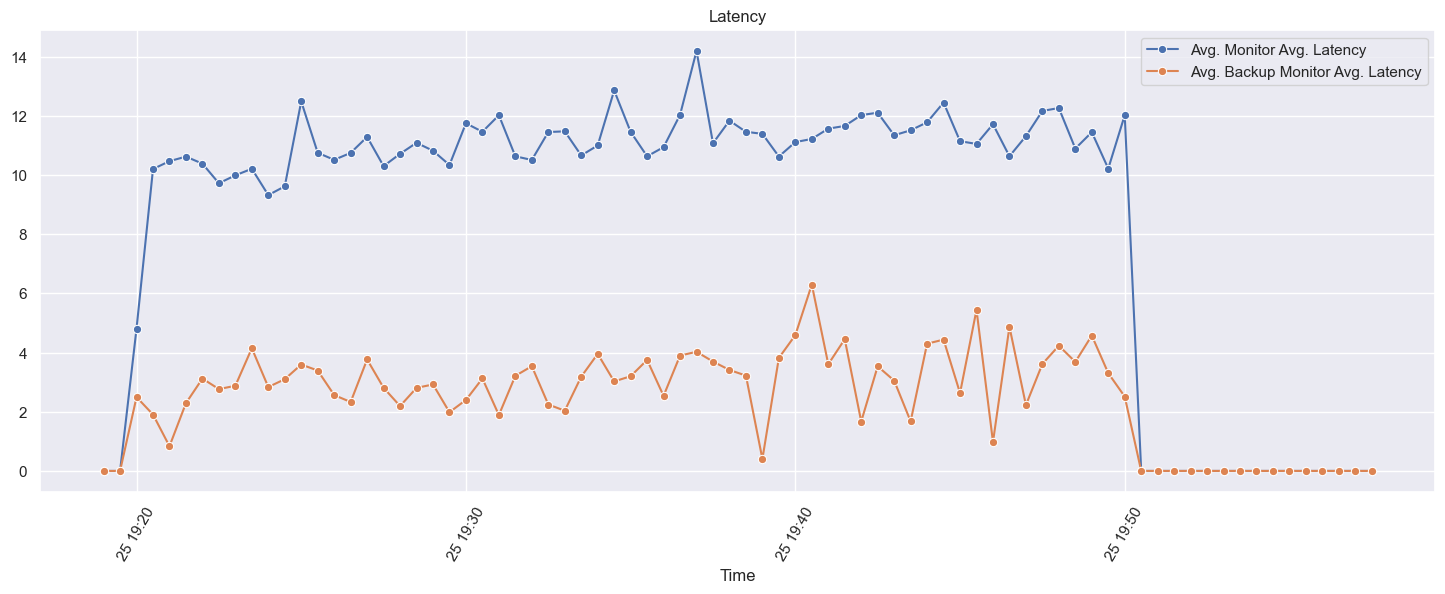

In [6]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.lineplot(data=melted_df, x='timestamp', y='value', hue='variable', legend=True, marker="o")
_ = plot.legend(title='')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Latency')

/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_22388/4032377863.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  _ = plot.legend(title='')


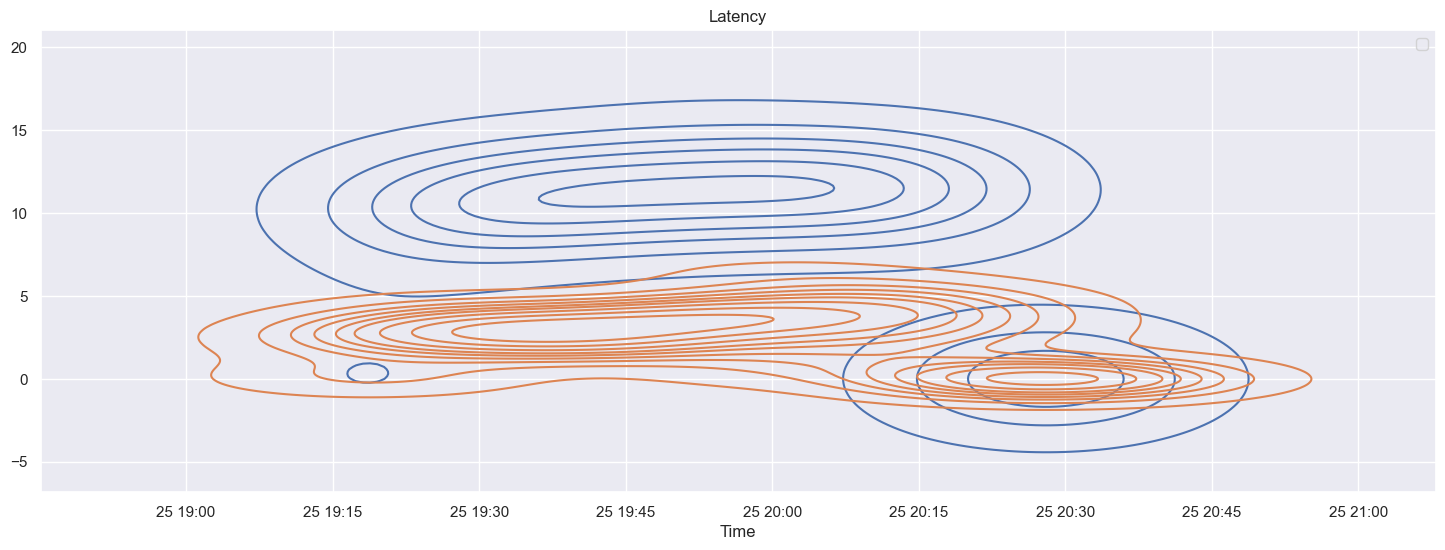

In [7]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.kdeplot(data=melted_df, x='timestamp', y='value', hue='variable', legend=True)
_ = plot.legend(title='')
# _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
# _ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Latency')

In [8]:
melted_df = pd.melt(df.loc[:, ['timestamp', 'client_stack_messages_processed_per_sec', 'ordered_batch_size_per_sec']], 'timestamp')
melted_df.loc[melted_df['variable'] == 'client_stack_messages_processed_per_sec', 'variable'] = 'Client stack messages processed per sec'
melted_df.loc[melted_df['variable'] == 'ordered_batch_size_per_sec', 'variable'] = 'Ordered batch size per sec'
melted_df

,timestamp,variable,value
0,2024-06-25 19:18:00,Client stack messages processed per sec,0.000000
1,2024-06-25 19:19:00,Client stack messages processed per sec,1.716667
2,2024-06-25 19:20:00,Client stack messages processed per sec,131.350000
3,2024-06-25 19:21:00,Client stack messages processed per sec,137.400000
4,2024-06-25 19:22:00,Client stack messages processed per sec,139.683333
...,...,...,...
151,2024-06-25 20:31:00,Ordered batch size per sec,0.000000
152,2024-06-25 20:32:00,Ordered batch size per sec,0.000000
153,2024-06-25 20:33:00,Ordered batch size per sec,0.000000
154,2024-06-25 20:34:00,Ordered batch size per sec,0.000000


/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_22388/1886614044.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


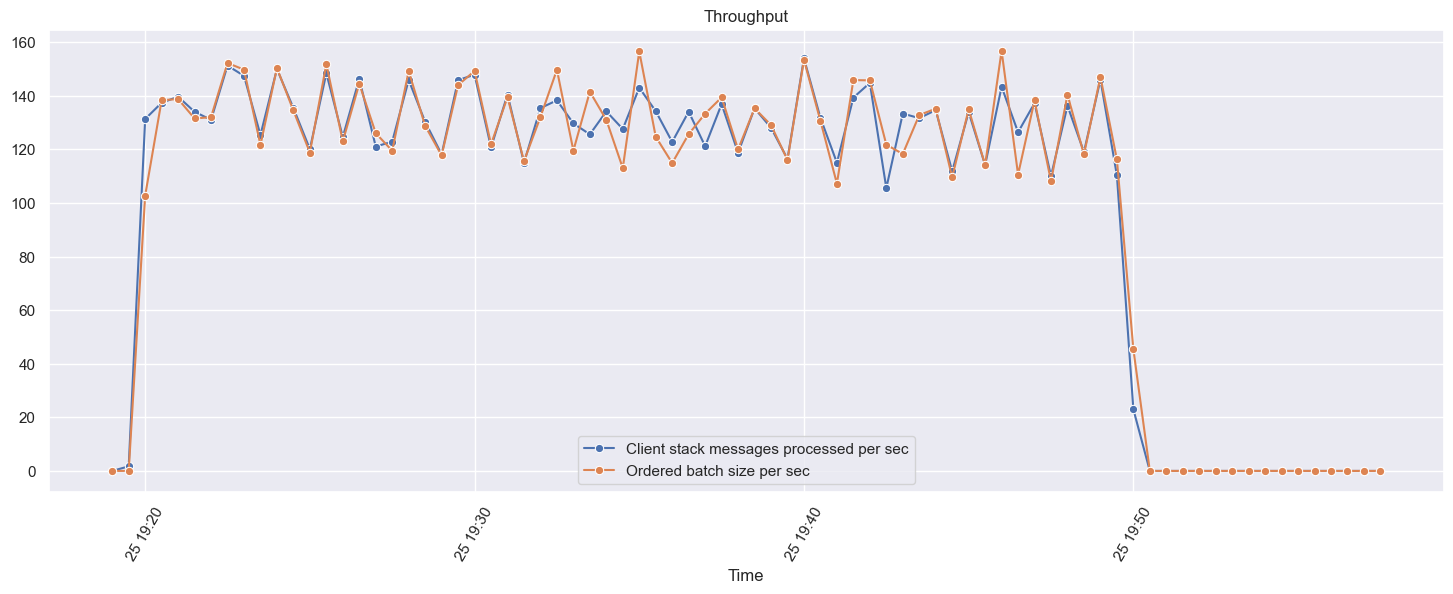

In [9]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.lineplot(data=melted_df, x='timestamp', y='value', hue='variable', legend=True, marker="o")
_ = plot.legend(title='')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Throughput')

/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_22388/4126820471.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  _ = plot.legend(title='')


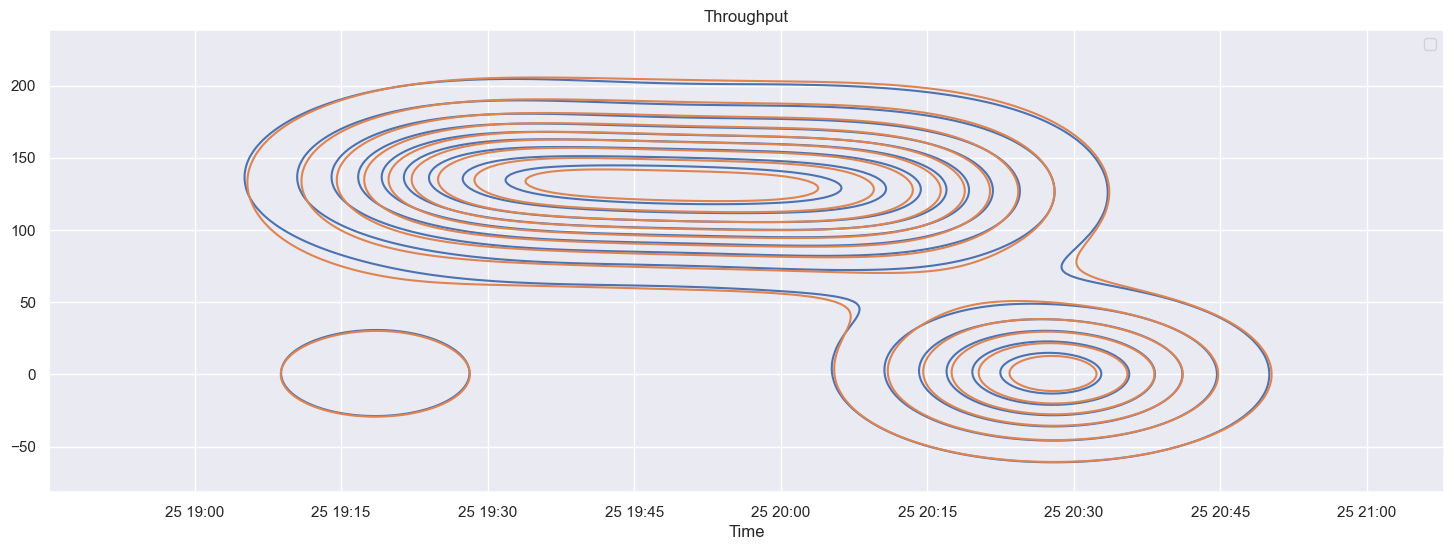

In [10]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.kdeplot(data=melted_df, x='timestamp', y='value', hue='variable', legend=True)
_ = plot.legend(title='')
# _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
# _ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Throughput')